In [10]:
!pip install opencv-python-headless

mount to drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


upload a file

In [12]:
from google.colab import files
uploaded = files.upload()



Saving im2.webp to im2 (1).webp


uploaded files

In [13]:
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

User uploaded file "im2 (1).webp" with length 42668 bytes


import the package


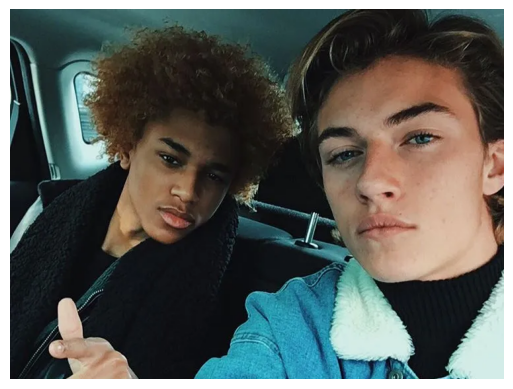

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the image
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

if img is None:
    print(f'Error: Could not load image {filename}')
else:
    # Convert BGR image to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


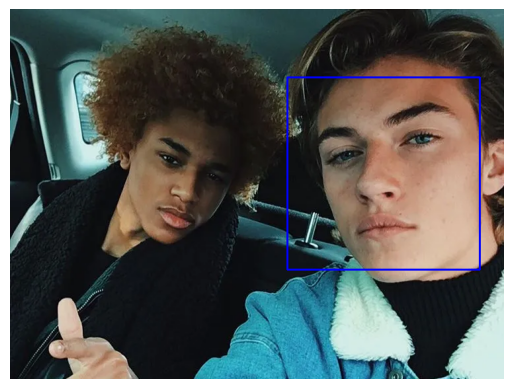

In [15]:
def detect_faces(image_path):

    img = cv2.imread(image_path)


    if img is None:
        print(f'Error: Could not load image {image_path}')
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Run face detection
for filename in uploaded.keys():
    detect_faces(filename)
